In [2]:
import os,sys
datapath   = "..\\"
print('datapath is set to %s'%datapath)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import Read_LoodatGapfill

datapath is set to ..\


In [3]:
#my own functions
from Loobos_Toolbox_Dendro_Grwater import Read_Dendrometers,notmatch

In [4]:
#set the years. for testing purposes, just do 2000-2001
years      = range(2000,2001) 

### Read files

In [6]:
# Read files
df_Comb         = Read_LoodatGapfill     (years,datapath)

Loading 2000
df_Comb loaded. Columns in this dataframe:
Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall',
       'NEE_fall_qc', 'NEE_fnum', 'NEE_fsd', 'NEE_fmeth', 'NEE_fwin',
       'Rg_orig', 'Rg_f', 'Rg_fqc', 'Rg_fall', 'Rg_fall_qc', 'Rg_fnum',
       'Rg_fsd', 'Rg_fmeth', 'Rg_fwin', 'H_orig', 'H_f', 'H_fqc', 'H_fall',
       'H_fall_qc', 'H_fnum', 'H_fsd', 'H_fmeth', 'H_fwin', 'LE_orig', 'LE_f',
       'LE_fqc', 'LE_fall', 'LE_fall_qc', 'LE_fnum', 'LE_fsd', 'LE_fmeth',
       'LE_fwin', 'Tair_orig', 'Tair_f', 'Tair_fqc', 'Tair_fall',
       'Tair_fall_qc', 'Tair_fnum', 'Tair_fsd', 'Tair_fmeth', 'Tair_fwin',
       'PotRad', 'FP_NEEnight', 'FP_Temp', 'E_0', 'R_ref', 'Reco', 'GPP_f',
       'GPP_fqc'],
      dtype='object')


## Testing use of rolling average for LE

<Axes: >

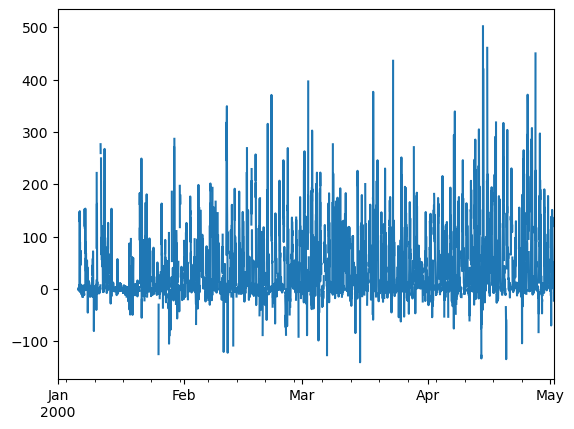

In [19]:
#plotting df_Comb['LE']
df_Comb['LE'].loc['01-01-2000':'05-01-2000'].plot()

In [24]:
#simple moving average (30 values)
#for tutorial see https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
df_Comb['LE_SMA30']= df_Comb['LE'].rolling('3D').mean()

<Axes: >

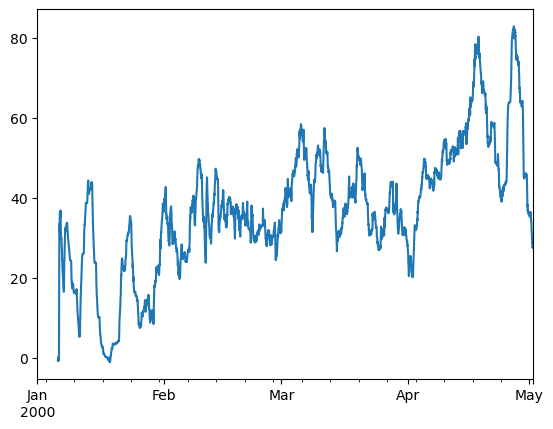

In [25]:
df_Comb['LE_SMA30'].loc['01-01-2000':'05-01-2000'].plot()

## calculating and plotting bowen ratio and 3 day average

In [21]:
# note to self: for pretty plotting you might have to use .dropna(inplace=True) to remove gaps in lineplot

In [7]:
#construct temp dataframe
df_bowen = pd.concat([df_Comb['H'],df_Comb['LE'],df_Comb['Hour'],df_Comb['Year']],axis=1,sort=False)

#step 2 select for hours between 9am and 4pm
df_bowen = df_bowen.loc[df_bowen.index.hour <= 16]
df_bowen = df_bowen.loc[df_bowen.index.hour >= 9]

#step 3 exclude data where LE or H are below 50
df_bowen = df_bowen.loc[df_bowen['LE'] >= 50]
df_bowen = df_bowen.loc[df_bowen['H'] >= 50]

#step 4 exclude data where months are not april-september (4-9)
df_bowen = df_bowen.loc[df_bowen.index.month < 10]
df_bowen = df_bowen.loc[df_bowen.index.month > 3]

#step 4 calulcate bowen ratio
df_bowen['Bowen_R']=df_bowen['H']/df_bowen['LE']
#simple moving average. Use the alias '3D' as a string to refer to timedelta = 3 days
#documentation for the method 'rolling': https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
#list of aliases for timedeltas: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df_bowen['Bowen_R_3DSMA']=df_bowen['Bowen_R'].rolling('3D').mean()

## Plotting

### Bowen ratio

<Axes: >

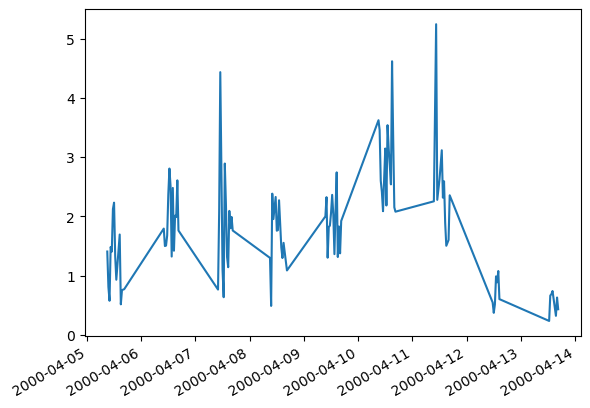

In [8]:
df_bowen['Bowen_R'].loc['04-05-2000':'04-13-2000'].plot()

### 3 day average of Bowen ratio

<Axes: >

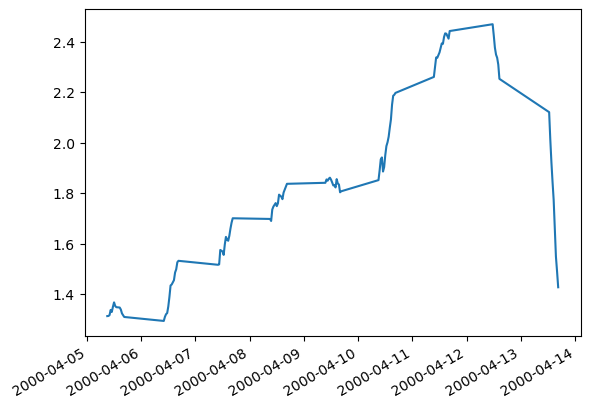

In [9]:
df_bowen['Bowen_R_3DSMA'].loc['04-05-2000':'04-13-2000'].plot()